# Imports

In [1]:
import os
import sys
sys.path.insert(0, os.environ.get('SRC_FIGMA_PATH'))

import resources.context as c # First import because it's not object oriented
from cryptocurrencyetl import CryptocurrencyEtl
from dataanalysis import DataAnalysis
from datatransform import DataTransform
from timeseriesmodeling import TimeSeriesModeling

# 1.0. Data Extraction

In [2]:
# extract any cryptocurrency historical data to analysis
crypto = 'BTC'
market_curr = 'USD'
api_key = os.environ.get('TOKEN_FIGMA_CRYPTO_KEY')

crypt_etl = CryptocurrencyEtl(crypto=crypto, market_curr=market_curr, api_key=api_key)

#crypt_etl.test_market_curr()
#crypt_etl.test_crypto()

df_btc_usd = crypt_etl.run()

CryptoETL || 2022-06-28 20:44:07,671 (INFO) || Initing extract of ETL to obtain BTC historical data in USD value!
CryptoETL || 2022-06-28 20:44:09,706 (INFO) || Initing data transform of BTC historical data!
CryptoETL || 2022-06-28 20:44:09,725 (INFO) || ETL finished!


In [3]:
# use standard dataset to test notebook's code
#df_test = pd.read_csv(c.DATA_INT_FLD / 'test_df.csv')

# 2.0. Data Analysis

In [4]:
analy = DataAnalysis(df_btc_usd, date_col='timestamp', individual_figsize=(18, 8), start_date='2021-01-01')

## Adfuller Description

In [5]:
txt_path = c.FIG_FLD / 'crypto_analysis/adffuller_description.txt'
analy.adfuller_description(y='close', saving_txtloc=txt_path)

1. ADF : -1.6154078398232345
2. P-Value : 0.4751375974512864
3. Num Of Lags : 0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation: 543
5. Critical Values :
	1%: -3.442450336733213
	5%: -2.8668774460774498
	10%: -2.5696126760816553



## Statistical Description

In [6]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_statistical_description_test.png'
analy.statistical_description(saving_figloc=fig_path)

[0628/204409.964013:ERROR:sandbox_linux.cc(378)] InitializeSandbox() called with multiple threads in process gpu-process.
[0628/204410.065020:INFO:headless_shell.cc(653)] Written to file /tmp/tmp08z4cd1q/temp.png.


,attributes,mean,median,std,min,max,range,skew,kurtosis
0,open,44008.389081,43065.810000,10195.385281,18970.79000,67525.820000,48555.030000,0.091374,-0.559996
1,high,45270.711305,44121.245000,10352.403133,20792.06000,69000.000000,48207.940000,0.069304,-0.552835
2,low,42526.394173,41969.405000,10045.842211,17622.00000,66222.400000,48600.400000,0.090886,-0.563732
3,close,43993.749926,43065.810000,10223.375127,18970.79000,67525.830000,48555.040000,0.079428,-0.546201
4,volume,65789.156977,55250.568407,38858.375297,1466.20753,354347.243161,352881.035631,2.365823,9.149807


## Seasonal Decomposition

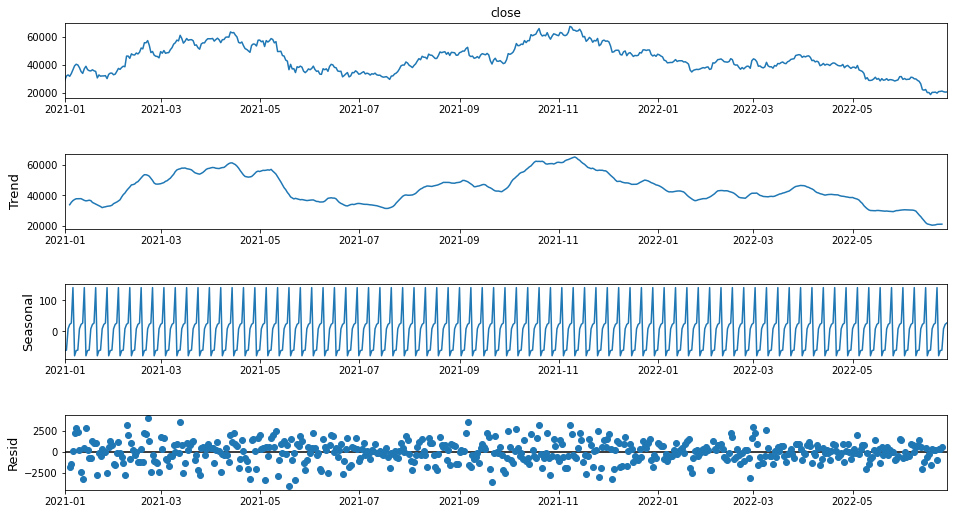

In [7]:
fig_path = c.FIG_FLD / 'crypto_analysis/seasonal_decomposer.jpg'
analy.plot_seasonal_decomposer(y='close', saving_figloc=fig_path, all_inches=(15, 8))

## Temporal Estability

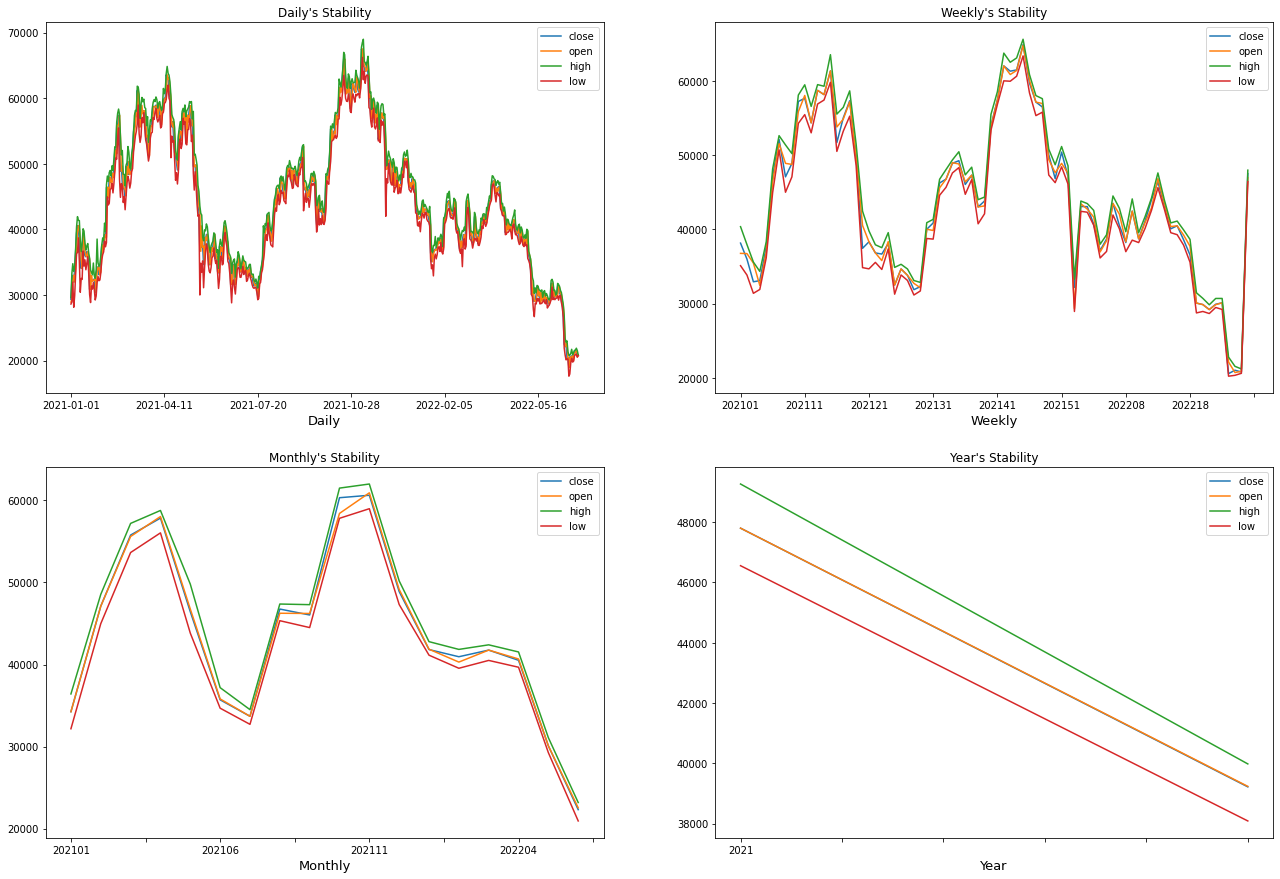

In [8]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_stability_all.jpg'
analy.all_timely_stability(y=['close', 'open', 'high', 'low'], saving_figloc=fig_path)

## Outlier Identification

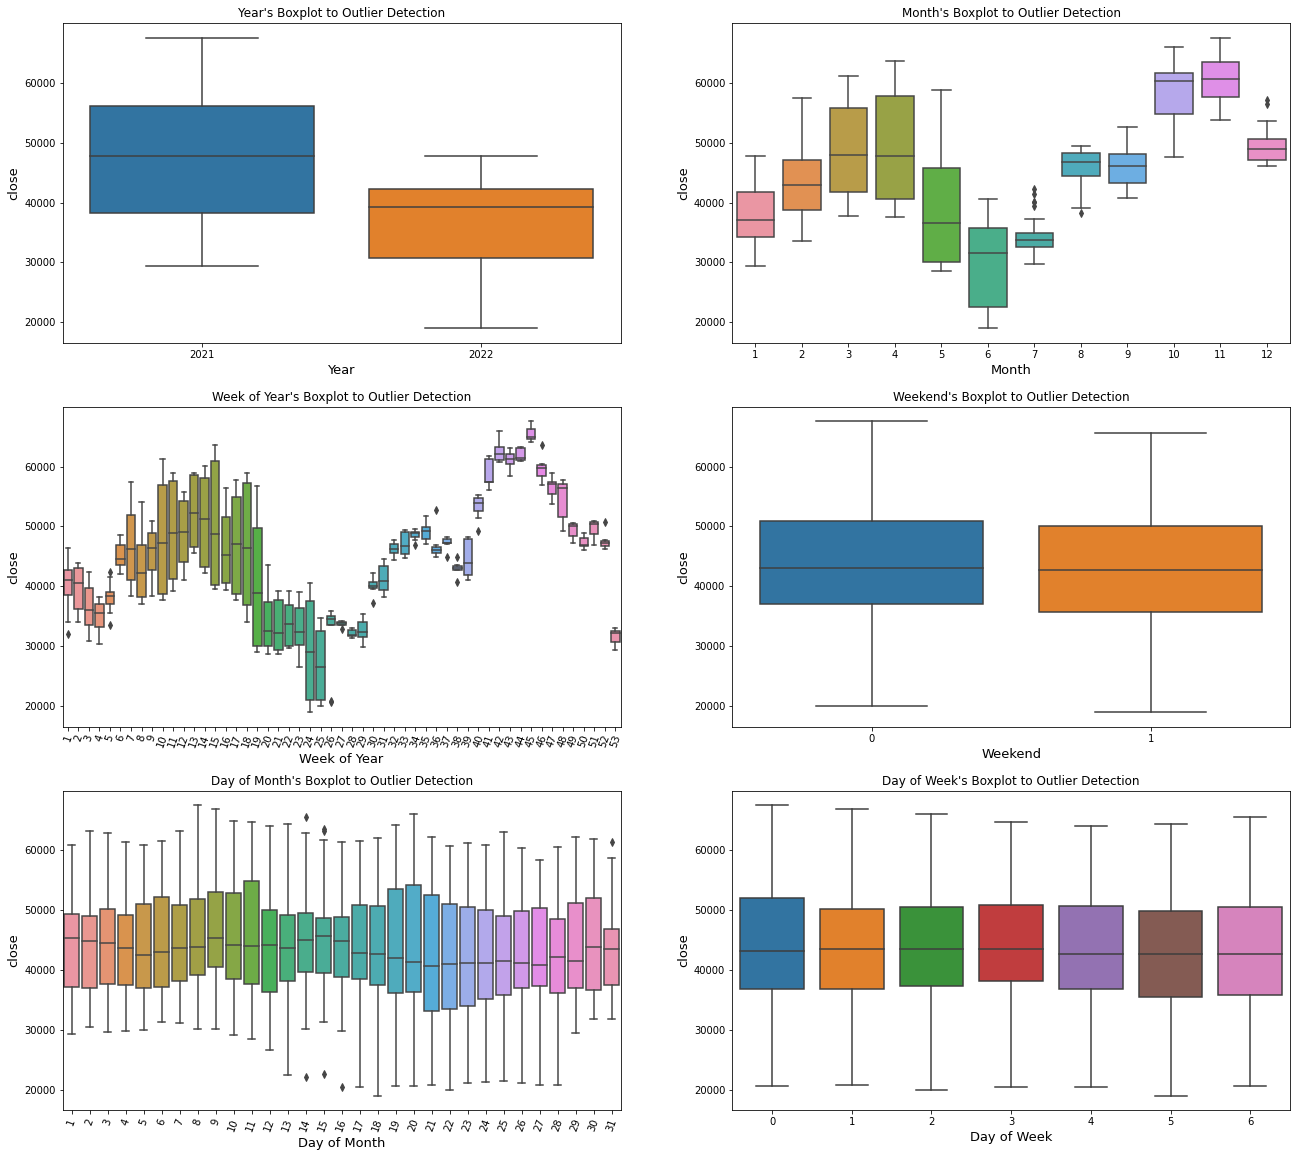

In [9]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_outlier_detector_all.jpg'
analy.all_temporal_outlier_detector_boxplots(y='close', saving_figloc=fig_path)

## Distribution

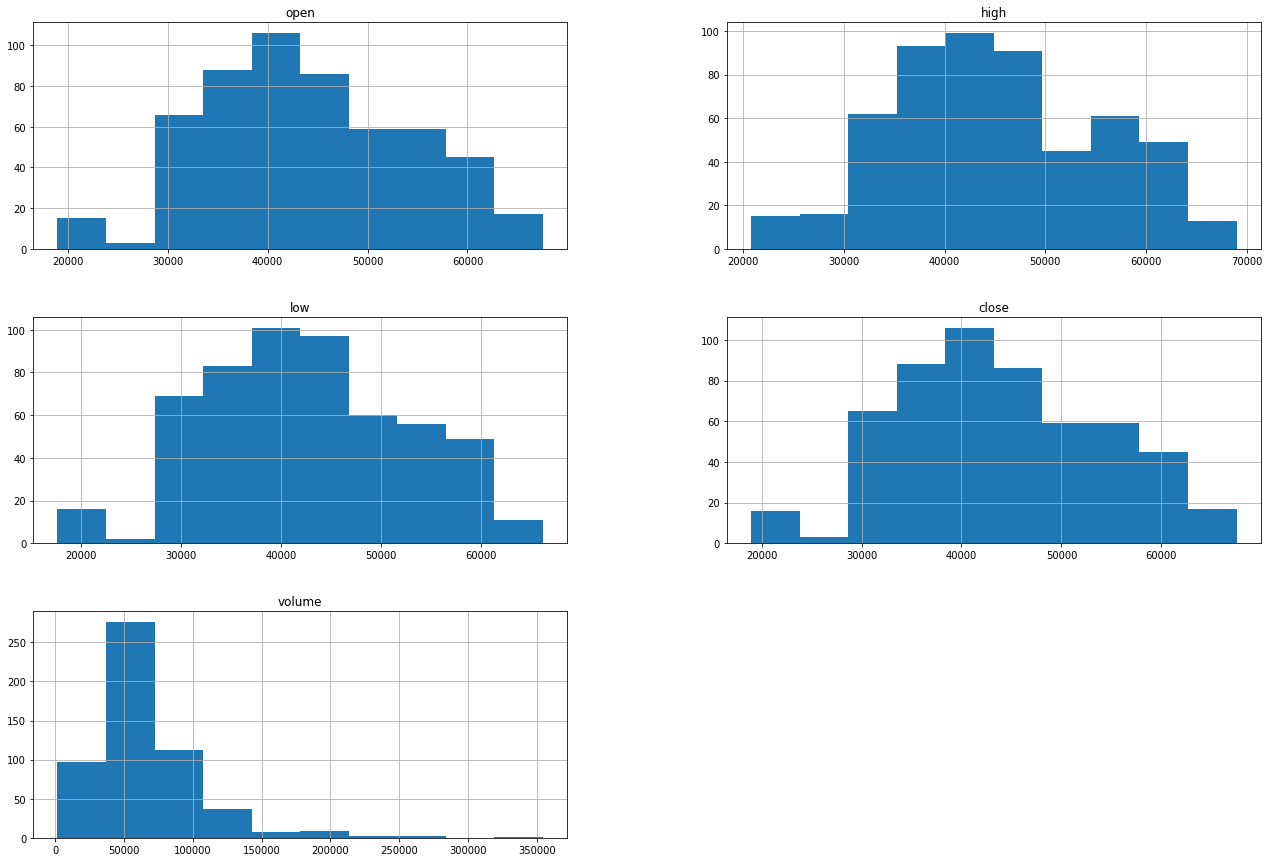

In [10]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_distribution_check.jpg'
analy.distribution_check(saving_figloc=fig_path)

## Nature Transformation Effect

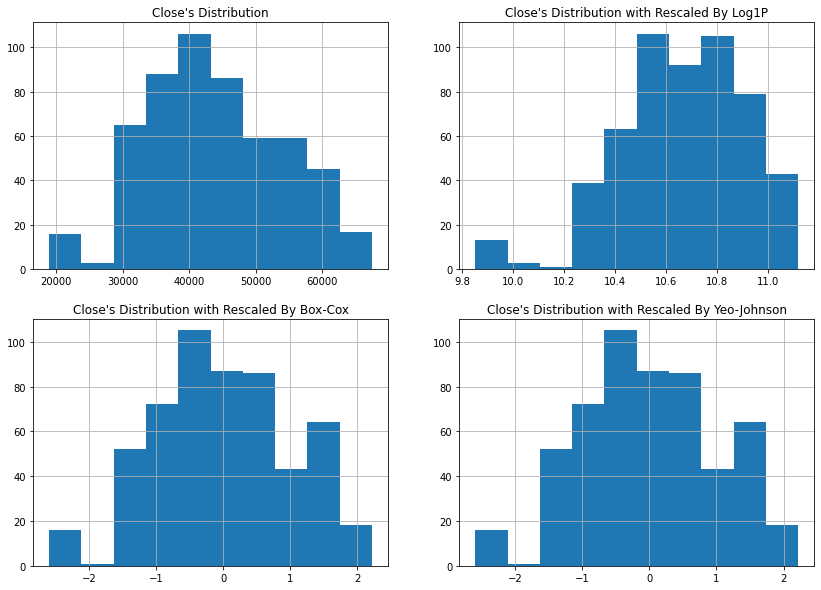

In [11]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_nature_transformation_check.jpg'
analy.rescalling_effect_check(y='close', all_figsize=(14, 10), saving_figloc=fig_path)

# 3.0. Data Preparation

In [12]:
transforming_df = DataTransform(df=df_btc_usd, date_col='timestamp', start_date='2022-01-01')
df_prep, scaler = transforming_df.prepare_dataframe_timeseries(y='close', method='log1p')

DataTrans || 2022-06-28 20:44:15,587 (WARNING) || The mean difference in log1p transformation 
                                         is below 0.01! (difference = 1.4023493725660792e-12)


# 4.0. Machine Learning Model

## 4.1. Model Fit

In [13]:
df_prep = pickle.load(open(c.DATA_PROC_FLD / 'test_csv_no_pred.pkl', 'rb'))
ts_model = TimeSeriesModeling(df=df_prep)
model = ts_model.fit_sarimax()

NameError: name 'pickle' is not defined

## 4.2. Data Translation

### Summary

In [ ]:
ts_model.model_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          log1p_close   No. Observations:                  179
Model:             SARIMAX(2, 1, 5)x(1, 1, [1], 24)   Log Likelihood                 267.094
Date:                              Tue, 28 Jun 2022   AIC                           -514.187
Time:                                      20:11:49   BIC                           -483.818
Sample:                                  01-01-2022   HQIC                          -501.851
                                       - 06-28-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5608      3.053     -0.184      0.854      -6.544       5.423
ar.L2         -0.1551      1.981     -0.078      0.938      -4.038       3.728
ma.L1          0.5278      3.042      0.174      0.862      -5.434       6.490
ma.L2          0.1918      1.899      0.101      0.920      -3.529       3.913
ma.L3          0.0460      0.148      0.311      0.756      -0.244       0.336
ma.L4          0.0861      0.204      0.422      0.673      -0.314       0.486
ma.L5         -0.0203      0.284     -0.072      0.943      -0.576       0.536
ar.S.L24      -0.0861      0.181     -0.477      0.634      -0.440       0.268
ma.S.L24      -0.5887      0.162     -3.642      0.000      -0.905      -0.272
sigma2         0.0017      0.000      8.720      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.88
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -0.52
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Rolling Cross Validation

In [ ]:
# the number of validations to be in maximum P+Q, the recommendation is to be the biggest between these two!
roll_cross_val = ts_model.rolling_cross_validation(validations = 5, model=model, scaler=scaler, orig_name='close')
roll_cross_val

### Returning to real scaler

In [ ]:
df_result = ts_model.forecast()
reverse_df = DataTransform(df=df_result, start_date='2022-01-01')
cols = list(df_result.columns)
for col in cols:
    df_result[col] = reverse_df.inverse_transformation(df=df_result, y_nt=col, col_orig_name='close', scaler=scaler)[col + '_reversed']

### Time Stability

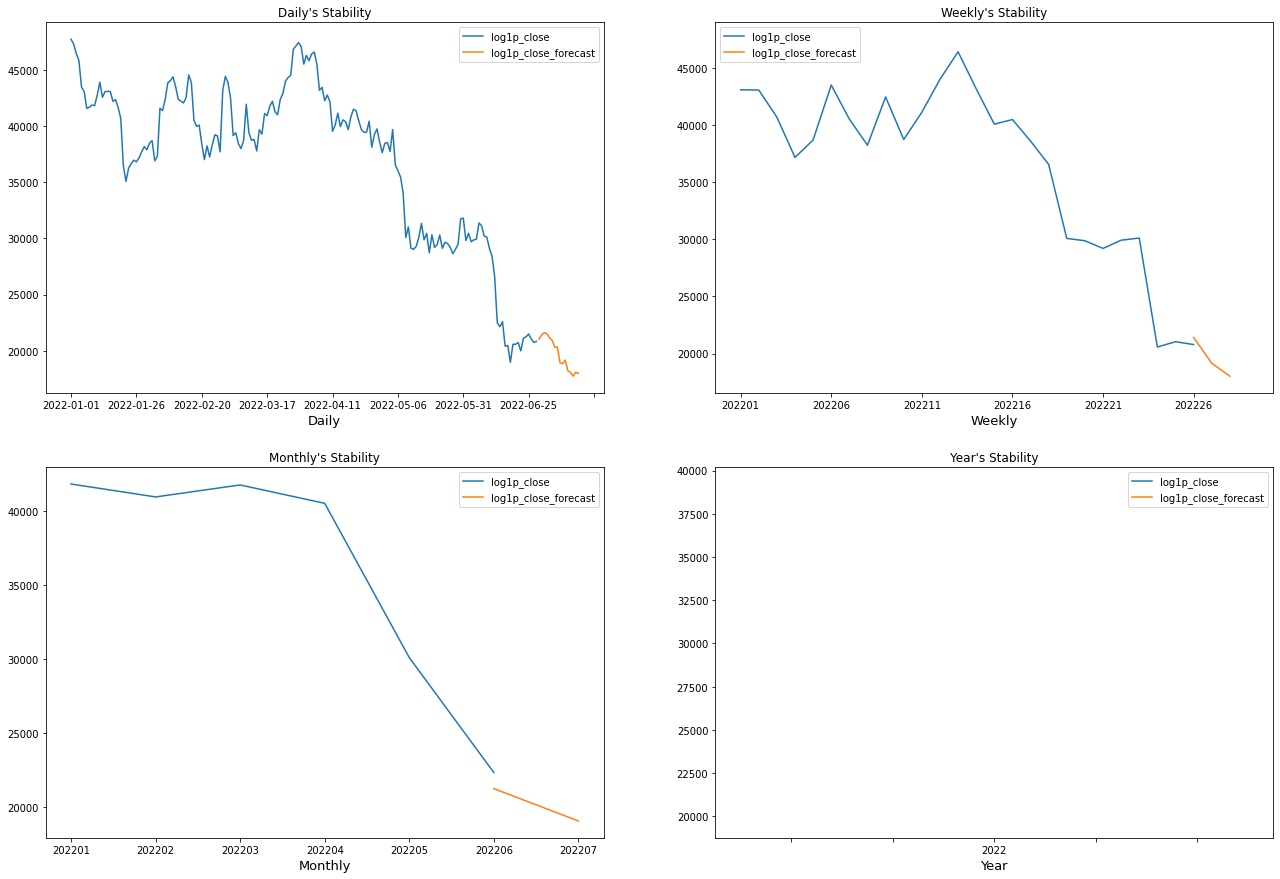

In [ ]:
analy = DataAnalysis(df_result, individual_figsize=(18, 10), start_date='2022-01-01')
fig_path = c.FIG_FLD / 'crypto_analysis/model_forecast.jpg'
analy.all_timely_stability(y=list(df_result.columns), saving_figloc=fig_path)